
**Dataset URL:** https://drive.google.com/file/d/1q89o1bEVy4mLcr464hC_4-r30V5JQIOz/view?usp=sharing

**Colab Link :** https://colab.research.google.com/drive/1c4uMOzwYlajnnBG-k6gF_kCp0qcKNIiM?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/wine_fraud.csv')

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


In [ ]:
df['quality'].value_counts()

,count
quality,
Legit,6251
Fraud,246


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.duplicated().sum()

np.int64(1177)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   object 
 12  type                  5320 non-null   object 
dtypes: float64(11), object(2)
memory usage: 581.9+ KB


Check for outliers in the dataset

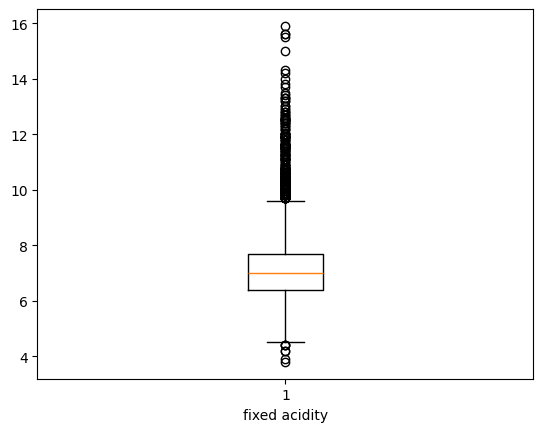

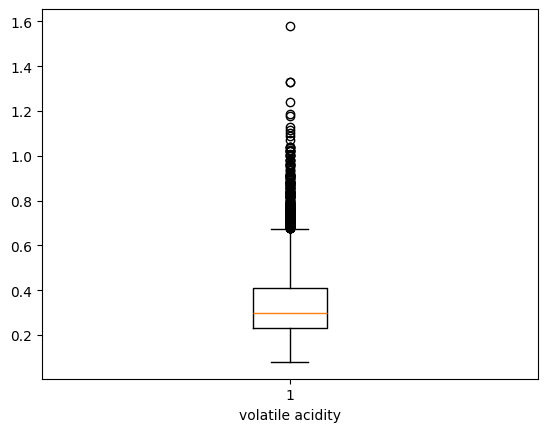

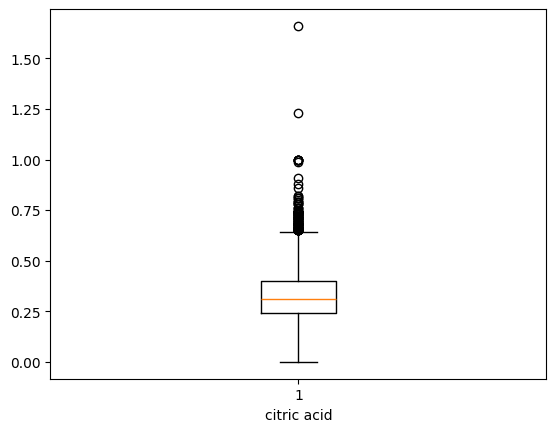

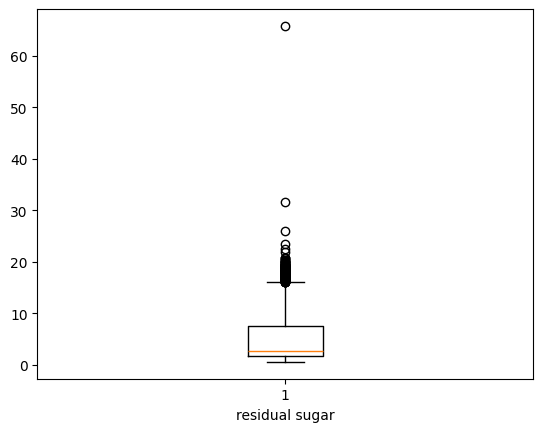

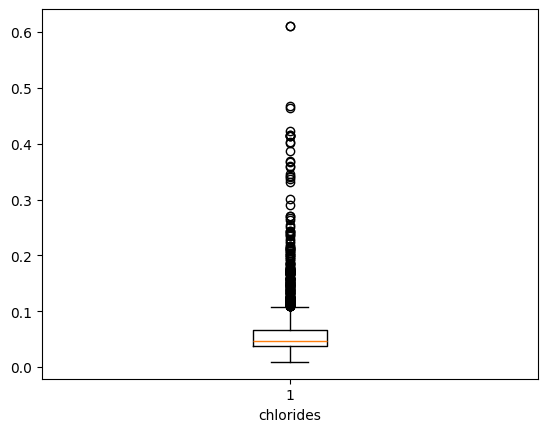

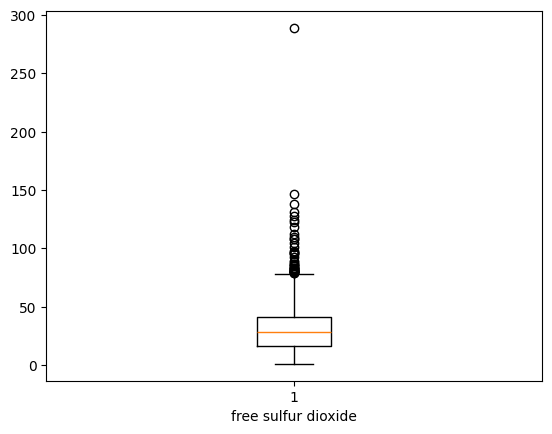

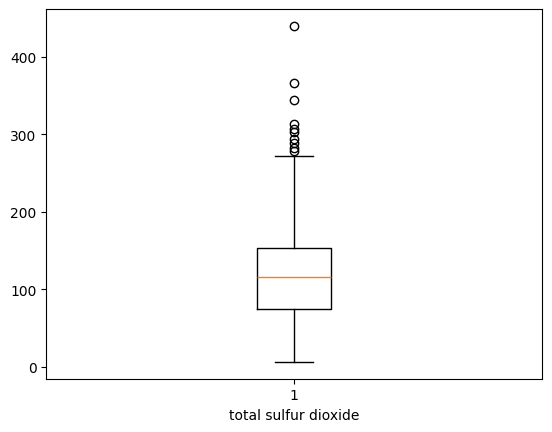

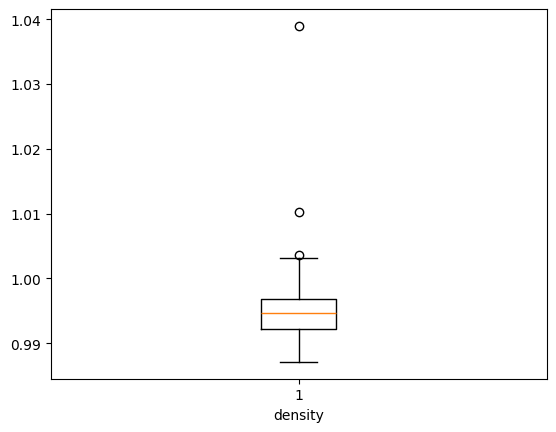

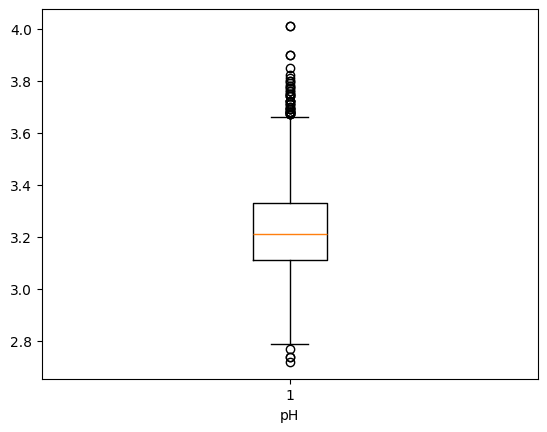

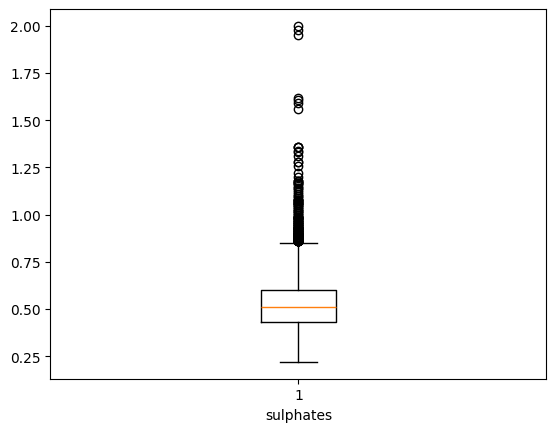

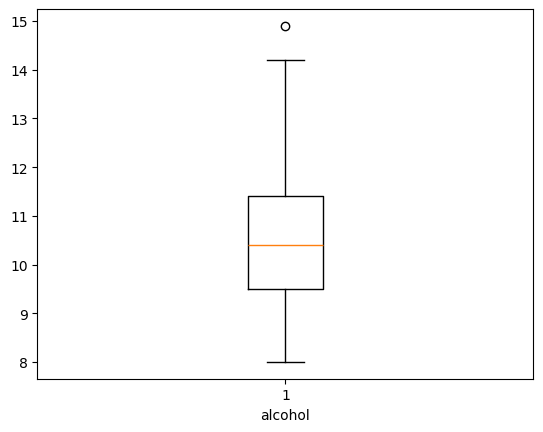

In [ ]:
for x in df.columns:
  if df[x].dtype=='object':
    continue
  plt.boxplot(df[x])
  plt.xlabel(x)
  plt.show()

In [ ]:
for x in df.columns:
  if df[x].dtype!='object':
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3-Q1
    lower_fence=Q1-1.5*IQR
    upper_fence=Q3+1.5*IQR

    df = df[(df[x]>=lower_fence)&(df[x]<=upper_fence)]

Convert our quality column and type column into numerical column.


In [ ]:
from sklearn.preprocessing import LabelEncoder  # This library is used to convert the categorical column in numerical column.


In [ ]:
le = LabelEncoder()
df['quality'] = le.fit_transform(df['quality'])
df['type'] = le.fit_transform(df['type'])

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,1,0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,1,0
20,8.9,0.22,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,1,0
21,7.6,0.39,0.31,2.3,0.082,23.0,71.0,0.99820,3.52,0.65,9.7,1,0
25,6.3,0.39,0.16,1.4,0.080,11.0,23.0,0.99550,3.34,0.56,9.3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,1


In [ ]:
li = []
for x in df.columns:
  if x=='quality':
    continue
  li.append(x)

In [ ]:
li   # Name of all independent columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'type']

In [ ]:
X= df[li]
y= df['quality']

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,0
20,8.9,0.22,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,0
21,7.6,0.39,0.31,2.3,0.082,23.0,71.0,0.99820,3.52,0.65,9.7,0
25,6.3,0.39,0.16,1.4,0.080,11.0,23.0,0.99550,3.34,0.56,9.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [ ]:
y

,quality
6,1
9,1
20,1
21,1
25,1
...,...
6492,1
6493,1
6494,1
6495,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=34)

In [ ]:
x_train.shape

(3049, 12)

In [ ]:
x_test.shape

(763, 12)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model= RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
result = pd.DataFrame(columns=['Actual values', 'Predicted values'])
result['Actual values'] = y_test
result['Predicted values'] = y_pred
result['Predicted values'].value_counts()

,count
Predicted values,
1,762
0,1


In [ ]:
y_test.value_counts()

,count
quality,
1,743
0,20


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9724770642201835

In [ ]:
# 1-> 743
# 0-> 20



In [ ]:
trees_li = [50,75,100,125,150]

for x in trees_li:
  dummy = RandomForestClassifier(n_estimators=x)
  dummy.fit(x_train,y_train)
  pred = dummy.predict(x_test)
  print("Number of decision tree : ", x, 'Accuracy Score: ',end='')
  print(accuracy_score(pred,y_test))


Number of decision tree :  50 Accuracy Score: 0.9711664482306684
Number of decision tree :  75 Accuracy Score: 0.9724770642201835
Number of decision tree :  100 Accuracy Score: 0.9724770642201835
Number of decision tree :  125 Accuracy Score: 0.9711664482306684
Number of decision tree :  150 Accuracy Score: 0.9737876802096985


In [ ]:
# Data Imbalance : If our target column, if there's class of one majority that data can be imbalance.
# It will perform very good on the data that we are using to train and test the model.
# But it may be a possibility it won't work well on the new unseen data.


# 1000-> Yes
# 60-> No
# SMOTE will balance our data

# SMOTE
Synthetic minority over sampling technique. It is a technique which is used to handle the imbalanced dataset.

It is a technique that is used when our data has more of one type and very few of another.

Ex:

We are building a model to detect fraud.

800 transactions are normal

50 are fraud.

It will ignore the fraud and it will only focus on normal.



In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()
new_X, new_y= smote.fit_resample(X,y)

In [ ]:
new_X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.900000,0.600000,0.060000,1.600000,0.069000,15.000000,59.000000,0.996400,3.300000,0.460000,9.400000,0
1,7.500000,0.500000,0.360000,6.100000,0.071000,17.000000,102.000000,0.997800,3.350000,0.800000,10.500000,0
2,8.900000,0.220000,0.480000,1.800000,0.077000,29.000000,60.000000,0.996800,3.390000,0.530000,9.400000,0
3,7.600000,0.390000,0.310000,2.300000,0.082000,23.000000,71.000000,0.998200,3.520000,0.650000,9.700000,0
4,6.300000,0.390000,0.160000,1.400000,0.080000,11.000000,23.000000,0.995500,3.340000,0.560000,9.300000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7369,9.134741,0.306579,0.487001,1.934741,0.048342,15.010556,119.000000,0.995988,3.136579,0.617054,10.001583,1
7370,7.209094,0.477454,0.251546,3.137279,0.048064,4.290906,20.327251,0.994072,3.267091,0.405091,10.709094,0
7371,6.808936,0.535850,0.180894,4.732645,0.056393,15.146048,98.022339,0.995110,3.337646,0.403815,9.146048,1
7372,6.458996,0.237770,0.368130,0.738849,0.050094,24.647490,111.906486,0.991755,3.353165,0.420935,10.987050,1


In [ ]:
y.value_counts()

,count
quality,
1,3687
0,125


In [ ]:
new_y.value_counts()

,count
quality,
1,3687
0,3687


In [ ]:
new_X.duplicated().sum()

np.int64(0)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(new_X,new_y,test_size=0.2, random_state=42)


In [ ]:
x_train.shape

(5899, 12)

In [ ]:
x_test.shape

(1475, 12)

In [ ]:
y_train.shape

(5899,)

In [ ]:
final_model= RandomForestClassifier()
final_model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = final_model.predict(x_test)
accuracy_score(y_pred,y_test)

0.9810169491525423